In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
#from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers.schedules import ExponentialDecay
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import tensorflow as tf



In [2]:
#PreProcessing
EPOCHS = 10
BS = 32
initial_learning_rate = 1e-4


DIRECTORY = r"D:\Batool\sync_Intern\Face-Mask-Detection\dataset"
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224,224))
        image = img_to_array(image)
        image = preprocess_input(image) #because we use  mobilenet

        data.append(image)
        labels.append(category)
        

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
#deep learning models only work with arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)
        
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                   test_size=0.20, stratify=labels, random_state=42)

[INFO] loading images...


d:\Batool\sync_Intern\Face-Mask-Detection-master\Face-Mask-Detection-master\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
img_shape = trainX[0].shape

model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model.fit(x=trainX,
                    y=trainY,
                    batch_size=100,
                    epochs=20,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector2.model", save_format="h5")

Epoch 1/20
25/25 - 158s - loss: 0.3884 - accuracy: 0.8475 - val_loss: 0.2064 - val_accuracy: 0.9169 - 158s/epoch - 6s/step
Epoch 2/20
25/25 - 150s - loss: 0.2095 - accuracy: 0.9282 - val_loss: 0.1864 - val_accuracy: 0.9397 - 150s/epoch - 6s/step
Epoch 3/20
25/25 - 150s - loss: 0.1936 - accuracy: 0.9384 - val_loss: 0.1620 - val_accuracy: 0.9495 - 150s/epoch - 6s/step
Epoch 4/20
25/25 - 148s - loss: 0.1414 - accuracy: 0.9531 - val_loss: 0.1253 - val_accuracy: 0.9577 - 148s/epoch - 6s/step
Epoch 5/20
25/25 - 144s - loss: 0.1352 - accuracy: 0.9539 - val_loss: 0.1512 - val_accuracy: 0.9528 - 144s/epoch - 6s/step
Epoch 6/20
25/25 - 144s - loss: 0.1246 - accuracy: 0.9592 - val_loss: 0.1194 - val_accuracy: 0.9593 - 144s/epoch - 6s/step
Epoch 7/20
25/25 - 147s - loss: 0.1115 - accuracy: 0.9613 - val_loss: 0.1359 - val_accuracy: 0.9625 - 147s/epoch - 6s/step
Epoch 8/20
25/25 - 142s - loss: 0.0895 - accuracy: 0.9670 - val_loss: 0.1014 - val_accuracy: 0.9609 - 142s/epoch - 6s/step
Epoch 9/20
25/25

d:\Batool\sync_Intern\Face-Mask-Detection-master\Face-Mask-Detection-master\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


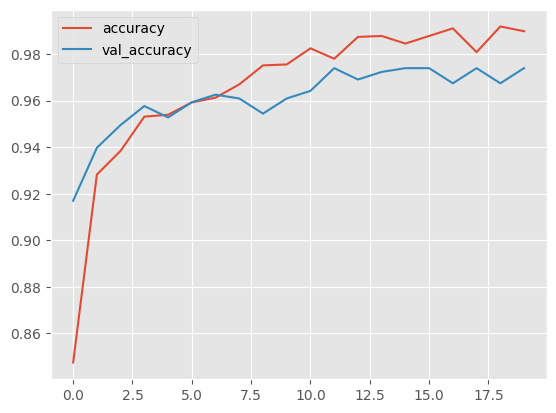

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [12]:
# Training with MobileNetV2
#output of mobilenet will be 2 models : 1-mobilenet model 2-normal model  \\output of mobilenet will be passed to normal model
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
)

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off

input_tensor = Input(shape=(224, 224, 3))
baseModel = MobileNetV2(weights="imagenet", include_top=False ,input_tensor = input_tensor)
#baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=input_tensor)
#baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=input_tensor)

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel) # 2 --> 2 layers(withmask,withoutmask)

# place the head FC model on top of the base model 
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

# compile model
print("[INFO] compiling model...")
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96)

opt = Adam(learning_rate=lr_schedule)

model.compile(loss="binary_crossentropy", optimizer=opt,
               metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),  #apply data augmentation to the training data
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS,
)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")


[INFO] compiling model...
[INFO] training head...
Epoch 1/10
95/95 [==============================] - 116s 1s/step - loss: 0.3953 - accuracy: 0.8560 - val_loss: 0.1460 - val_accuracy: 0.9857
Epoch 2/10
95/95 [==============================] - 96s 1s/step - loss: 0.1471 - accuracy: 0.9641 - val_loss: 0.0729 - val_accuracy: 0.9896
Epoch 3/10
95/95 [==============================] - 94s 994ms/step - loss: 0.1037 - accuracy: 0.9661 - val_loss: 0.0536 - val_accuracy: 0.9896
Epoch 4/10
95/95 [==============================] - 110s 1s/step - loss: 0.0763 - accuracy: 0.9789 - val_loss: 0.0429 - val_accuracy: 0.9922
Epoch 5/10
95/95 [==============================] - 106s 1s/step - loss: 0.0659 - accuracy: 0.9799 - val_loss: 0.0408 - val_accuracy: 0.9909
Epoch 6/10
95/95 [==============================] - 133s 1s/step - loss: 0.0537 - accuracy: 0.9852 - val_loss: 0.0355 - val_accuracy: 0.9922
Epoch 7/10
95/95 [==============================] - 133s 1s/step - loss: 0.0530 - accuracy: 0.9852 - va

d:\Batool\sync_Intern\Face-Mask-Detection-master\Face-Mask-Detection-master\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


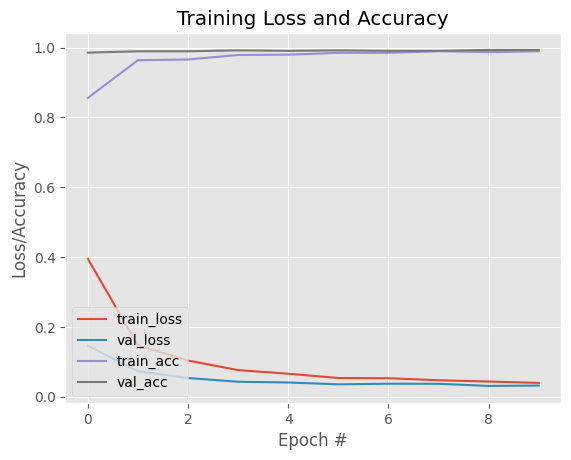

In [13]:

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")
